In [14]:
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt

from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

In [36]:
dropped_pixel_value = -100

def readim(fn):
    im = plt.imread(fn)
    im -= im.min()
    im /= im.max()
    im = mpt.colors.rgb_to_hsv(im[..., :3])
    im = im * 2 - 1
    return im

def showim(im):
    temp = im.copy()
    temp[temp == dropped_pixel_value] = -1
    temp = (temp - temp.min())
    temp /= temp.max()
    temp = mpt.colors.hsv_to_rgb(temp)
    plt.imshow(temp, cmap="hsv")

def get_patch(i, j, h, im):
    return im[i-h:i+h, j-h:j+h, :]

def noise(im, prc):
    temp = np.random.random(size=(2, int(prc * np.prod(im.shape))))
    temp[0] = temp[0] * im.shape[0]
    temp[1] = temp[1] * im.shape[1]
    ii, jj = np.array(temp, dtype=int)
    im[ii, jj, :] = dropped_pixel_value
    return im

def delete_rec(im, i, j, h, w):
    im[i:i+h, j:j+w, :] = (dropped_pixel_value, dropped_pixel_value, dropped_pixel_value)
    return im

def get_dic(im, patch_size, step):
    ret = []
    for i in range(0, im.shape[0], step):
        for j in range(0, im.shape[1], step):
            temp = get_patch(i, j, patch_size, im)
            if not dropped_pixel_value in temp :#and temp.shape == (patch_size, patch_size, 3):
                ret.append(temp)
    
    return ret

def get_missing(im, patch_size, step):
    ret = []
    for i in range(0, im.shape[0], step):
        for j in range(0, im.shape[1], step):
            temp = get_patch(i, j, patch_size, im)
            if dropped_pixel_value in temp :#and temp.shape == (patch_size, patch_size, 3):
                ret.append(temp)
    
    return ret

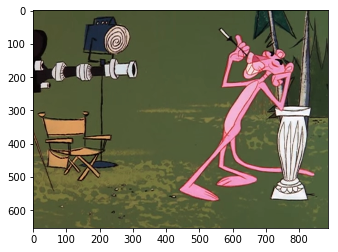

In [29]:
image = readim("img.png")
showim(image)

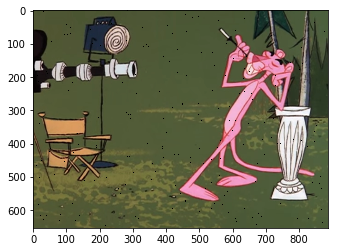

In [4]:
noised = noise(image.copy(), .001)
showim(noised)

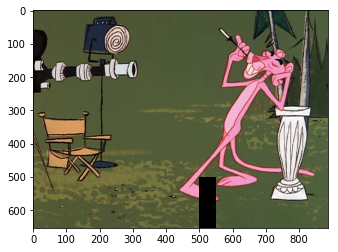

In [5]:
dropped = delete_rec(image.copy(), 500, 500, 300, 50)
showim(dropped)

In [37]:
print("Noised missing :", len(get_missing(noised,10, 5)))
print("Dropped missing :", len(get_missing(dropped, 10, 5)))

Noised missing : 15854
Dropped missing : 416


In [38]:
print("Noised dic :", len(get_dic(noised, 10, 5)))
print("Dropped dic :", len(get_dic(dropped, 10, 5)))

Noised dic : 7464
Dropped dic : 22902


In [39]:
print("Image patch :", len(get_dic(image, 10, 5)))

Image patch : 23318


In [40]:
dictionnary   = get_dic(noised, 10, 5)
noisy_patches = get_missing(noised, 10, 5)

In [46]:
np.array(list(map(lambda L: L.shape, dictionnary )))

array([[ 0,  0,  3],
       [ 0,  0,  3],
       [ 0, 20,  3],
       ...,
       [14, 20,  3],
       [14, 16,  3],
       [14, 11,  3]])